In [ ]:
#          ANALISE DE DADOS COM PANDAS

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
# describe() gera estatísticas descritivas para colunas numéricas
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
# shape retorna as dimensões da estrutura de dados.
df.shape

(133349, 11)

In [ ]:
linhas , colunas = df.shape[0] , df.shape[1]

print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Criando um dicionário para mapear os nomes das colunas em inglês para português
traducao_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Renomeando as colunas do DataFrame
df = df.rename(columns=traducao_colunas)

# Exibindo as primeiras linhas do DataFrame com as colunas traduzidas
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
# Renomeando as colunas do DataFrame
df = df.rename(columns=traducao_colunas)

In [ ]:
# value_counts() é usado para contar quantas vezes cada valor único aparece em uma coluna (Series) de um DataFrame.
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df['cargo'].value_counts()

,count
cargo,
Data Scientist,17314
Software Engineer,15007
Data Engineer,14868
Data Analyst,12381
Engineer,9456
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [ ]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
# Criando um dicionário para mapear os valores da coluna 'senioridade' para português
traducao_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

# Substituindo os valores na coluna 'senioridade'
df['senioridade'] = df['senioridade'].replace(traducao_senioridade)

# Exibindo a contagem de valores da coluna 'senioridade' para verificar a tradução
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
# Criando um dicionário para mapear os valores da coluna 'contrato' para português
traducao_contrato = {
    'FT': 'Integral',
    'CT': 'Contrato',
    'FL': 'Freelancer',
    'PT': 'Meio período'
}

# Substituindo os valores na coluna 'contrato'
df['contrato'] = df['contrato'].replace(traducao_contrato)

# Exibindo a contagem de valores da coluna 'contrato' para verificar a tradução
display(df['contrato'].value_counts())

,count
contrato,
Integral,132563
Contrato,394
Meio período,376
Freelancer,16


In [ ]:
# Criando um dicionário para mapear os valores da coluna 'tamanho_empresa' para português
traducao_tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

# Substituindo os valores na coluna 'tamanho_empresa'
df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho_empresa)

# Exibindo a contagem de valores da coluna 'tamanho_empresa' para verificar a tradução
display(df['tamanho_empresa'].value_counts())

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [ ]:
# Criando um dicionário para mapear os valores da coluna 'remoto' para português
traducao_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Substituindo os valores na coluna 'remoto'
df['remoto'] = df['remoto'].replace(traducao_remoto)

# Exibindo a contagem de valores da coluna 'remoto' para verificar a tradução
display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
# serve para gerar estatísticas descritivas somente para colunas do tipo object, ou seja, colunas com dados de texto ou categóricos (strings, por exemplo)
df.describe(include=object)

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [ ]:
#             PREPARAÇÃO E LIMPEZA DOS DADOS

In [ ]:
# Buscando dados nulos
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
# .any(axis=1) verifica linha por linha (axis=1) se existe ao menos um True(nulo)
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
import numpy as np

#  criando um DataFrame

df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000, np.nan, 5000, np.nan,100000]
})

In [ ]:
# .fillna() substitui os valores ausentes (NaN) por um valor definido, que pode ser, por exemplo, a média previamente calculada dos dados.

# calcula a media salarial e substitui os nulos pela media e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]

})

In [ ]:
# .ffill() - forward fill Preenche com o valor anterior (de cima) (Nan)
# .bfill() - backward fill Preenche com o valor seguinte (de baixo) (Nan)

df_temperaturas['preechido_ffill'] = df_temperaturas["Temperatura"].bfill()

df_temperaturas

,Dia,Temperatura,preechido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({
   'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"] ,
   'cidade': ["sao paulo", np.nan, "curitiba", np.nan, "belem"]

})

In [ ]:
df_cidades['cidade_preechida'] = df_cidades['cidade'].fillna('Nao informado')

df_cidades

,nome,cidade,cidade_preechida
0,Ana,sao paulo,sao paulo
1,Bruno,NaN,Nao informado
2,Carlos,curitiba,curitiba
3,Daniele,NaN,Nao informado
4,Val,belem,belem


In [ ]:
# .dropna() é usado para remover valores ausentes (NaN) de um DataFrame ou Série

# limpando o df original

df_limpos = df.dropna()

In [ ]:
df_limpos.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
# convertendo o ano de float64 para int64
# .assign() é usado para criar ou adicionar colunas novas (sem modificar o original)

df_limpos = df_limpos.assign(ano = df_limpos['ano'].astype('int64'))

In [ ]:
df_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
# .value_counts() retorna uma Série com a contagem de valores únicos de uma coluna ou Series.
df_limpos['senioridade'].value_counts()

,count
senioridade,
Senior,77236
Pleno,40462
Junior,12441
Executivo,3200


<Axes: title={'center': 'Distribuicao de senioridade'}, ylabel='senioridade'>

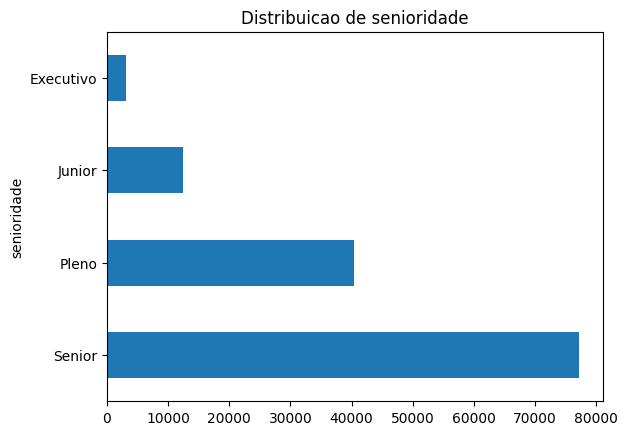

In [ ]:
df_limpos['senioridade'].value_counts().plot(kind='barh', title="Distribuicao de senioridade")

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

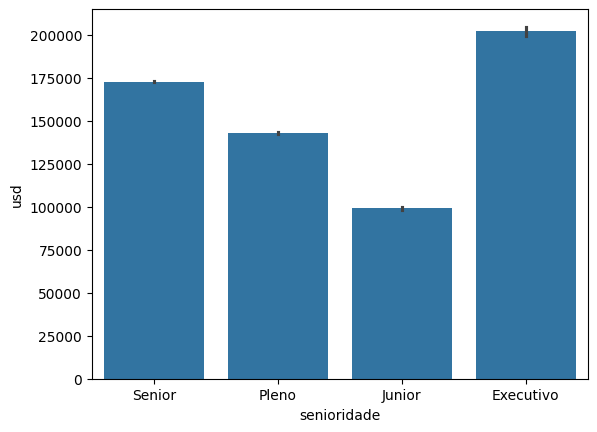

In [ ]:
# Grafico de barra para comparar os salario por cargo

sns.barplot(data=df_limpos, x='senioridade', y='usd')

In [ ]:
import matplotlib.pyplot as plt

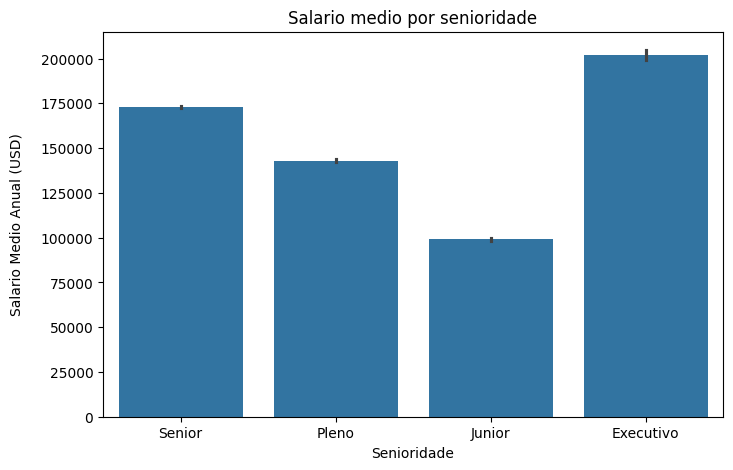

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpos, x='senioridade', y='usd')
plt.title("Salario medio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salario Medio Anual (USD)",labelpad=12)
plt.show()

In [ ]:
# Agrupando os dados por senioridade ,com a estatistica por usd e do maior ao menor valor

df_limpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
# ordenando do menor para o maior
# .sort_values(ascending=False) usado para organizar dados do menor para o maior

ordem = df_limpos.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

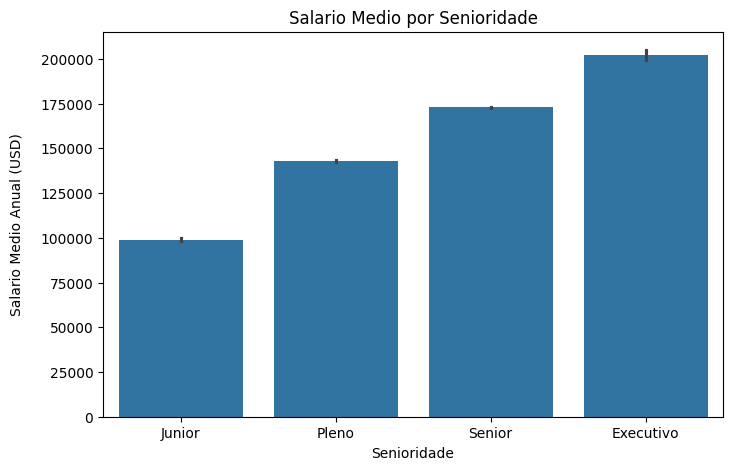

In [ ]:
# Grafico agrupando os dados do Maior ao Menor


plt.figure(figsize=(8,5))
sns.barplot(data=df_limpos, x='senioridade', y='usd',order=ordem)
plt.title("Salario Medio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salario Medio Anual (USD)",labelpad=12)
plt.show()

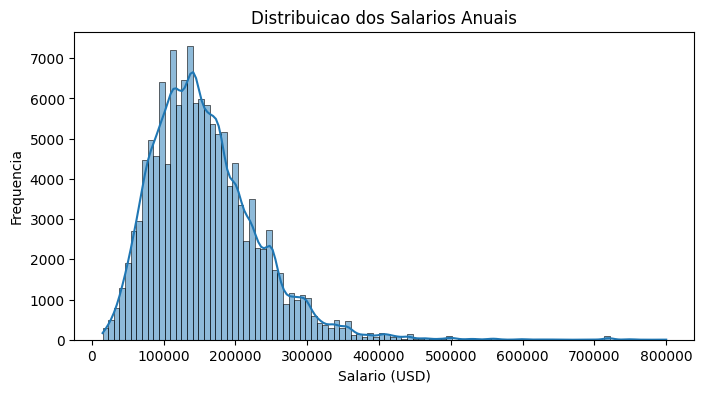

In [ ]:
plt.figure(figsize=(8,4))
# bins=50: Define o número de "caixas" (intervalos) do histograma como 50.
# kde=True: Habilita a curva de densidade de Kernel (Kernel Density Estimate), que é uma linha suave que estima a distribuição dos dados
sns.histplot(df_limpos['usd'], bins = 100, kde=True)
plt.title("Distribuicao dos Salarios Anuais")
plt.xlabel("Salario (USD)")
plt.ylabel("Frequencia")
plt.show()


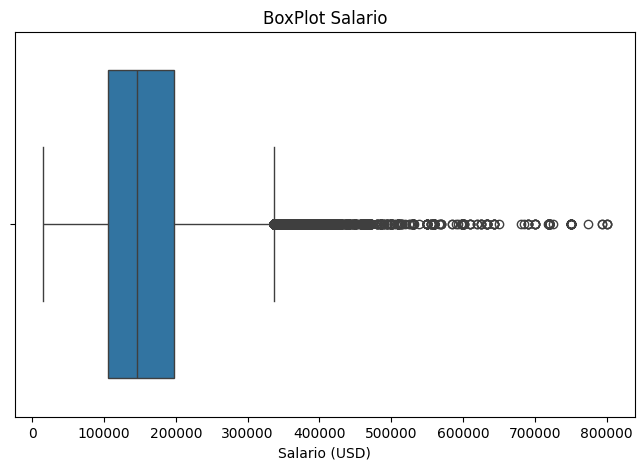

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpos['usd'])
plt.title("BoxPlot Salario")
plt.xlabel("Salario (USD)")
plt.show()

In [ ]:
 ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

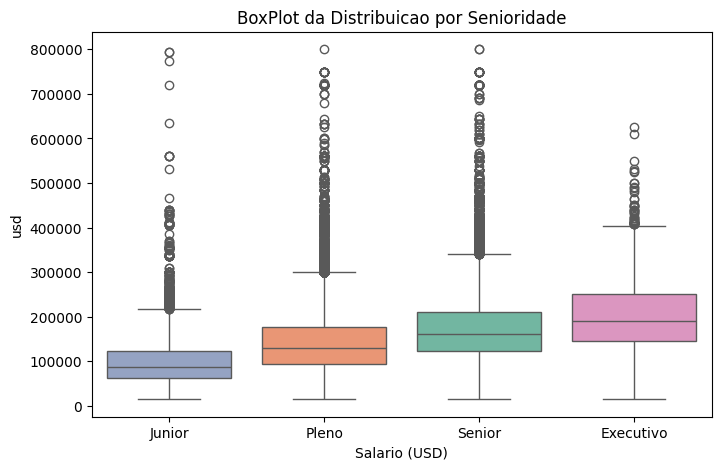

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpos, order=ordem_senioridade, palette='Set2', hue='senioridade') # hue='senioridade' usado para deferenciar os dados por cor
plt.title("BoxPlot da Distribuicao por Senioridade")
plt.xlabel("Salario (USD)")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# Calcular o salário médio por senioridade
df_salario_por_senioridade = df_limpos.groupby('senioridade')['usd'].mean().reset_index()

# Classifique o DataFrame por salário médio em ordem decrescente
df_salario_por_senioridade= df_salario_por_senioridade.sort_values(by='usd', ascending=False)

# Criar grafico de barra
fig = px.bar(df_salario_por_senioridade,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial (USD)'})

fig.show()

In [ ]:
# CRIANDO GRAFICO DE PIZZA

remoto_contagem = df_limpos['remoto'].value_counts().reset_index()

# criando uma lista
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Prorpoçao dos Tipos de Trabalho')

fig.show()

In [ ]:
# CRIANDO GRAFICO DE ROSCA PARA MELHOR VISUALIZAÇAO

remoto_contagem = df_limpos['remoto'].value_counts().reset_index()

# criando uma lista
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Prorpoçao dos Tipos de Trabalho',
             hole=0.5
           )

# define que, dentro de cada fatia do gráfico (como em um gráfico de pizza ou Rosca ), serão exibidos tanto o nome da categoria (label) quanto sua porcentagem (percent).
fig.update_traces(textinfo='percent+label')

fig.show()

In [ ]:
# Filtrar o DataFrame para funções de 'Cientista de Dados'
df_data_scientist = df_limpos[df_limpos['cargo'] == 'Data Scientist']

# Calcular o salário médio por residência para Cientistas de Dados
df_salário_médio_cientista_por_país = df_data_scientist.groupby('residencia')['usd'].mean().reset_index()

# Classifique os resultados por salário médio em ordem decrescente
df_salário_médio_cientista_por_país  = df_salário_médio_cientista_por_país .sort_values(by='usd', ascending=False)


# Crie o gráfico de barras
fig = px.bar(df_salário_médio_cientista_por_país ,
             x='residencia',
             y='usd',
             title='Média Salarial para Data Scientists por País de Residência',
             labels={'residencia': 'País de Residência', 'usd': 'Média Salarial (USD)'})

fig.show()

In [ ]:
df_limpos.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
!pip install pycountry

In [ ]:
# USANDO UM MAPA INTERATIVO PARA 'Salário médio de Cientista de Dados por país'

import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpos['residencia_iso3'] = df_limpos['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpos[df_limpos['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()